In [1]:
# Question 1: Feature Scaling
# Task: Explain why feature scaling is essential and demonstrate the impact of unscaled features on a machine learning model.




# Question 2: Min-Max Scaling
# Task: Implement Min-Max Scaling on the Iris dataset.



# Question 3: Standardization (Z-score Scaling)
# Task: Implement Standardization using Z-score scaling on the Iris dataset.




# Question 4: Robust Scaling
# Task: Implement Robust Scaling to handle outliers in the Iris dataset.







Mean Squared Error (Unscaled): 0.2494
Training Time (Unscaled): 0.0122 seconds

Mean Squared Error (Scaled): 0.2494
Training Time (Scaled): 0.0016 seconds


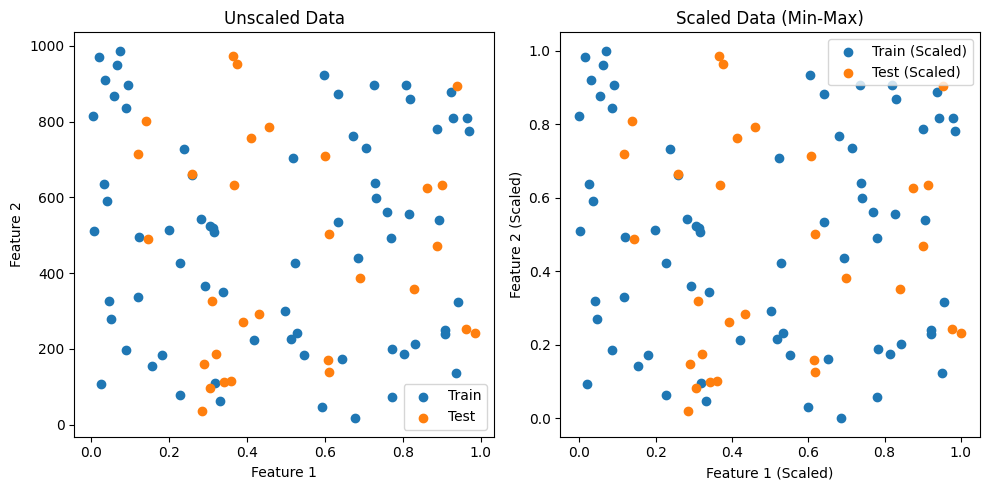

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time

# Generate synthetic data with one feature on a much larger scale
np.random.seed(42)
X = np.random.rand(100, 2)
X[:, 1] *= 1000  # Make the second feature have a larger scale
y = 2 * X[:, 0] + 0.005 * X[:, 1] + np.random.randn(100) * 0.5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a linear regression model on unscaled data
start_time = time.time()
model_unscaled = LinearRegression()
model_unscaled.fit(X_train, y_train)
y_pred_unscaled = model_unscaled.predict(X_test)
mse_unscaled = mean_squared_error(y_test, y_pred_unscaled)
training_time_unscaled = time.time() - start_time

print(f"Mean Squared Error (Unscaled): {mse_unscaled:.4f}")
print(f"Training Time (Unscaled): {training_time_unscaled:.4f} seconds")

# Scale the features using Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train a linear regression model on scaled data
start_time = time.time()
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train_scaled)
y_pred_scaled = model_scaled.predict(X_test_scaled)
mse_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)
training_time_scaled = time.time() - start_time

print(f"\nMean Squared Error (Scaled): {mse_scaled:.4f}")
print(f"Training Time (Scaled): {training_time_scaled:.4f} seconds")

# Visualize the data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], label='Test')
plt.title('Unscaled Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], label='Train (Scaled)')
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], label='Test (Scaled)')
plt.title('Scaled Data (Min-Max)')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend()
plt.tight_layout()
plt.show()

In [3]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Load the Iris dataset
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

print("Original Iris Dataset (first 5 rows):\n", df_iris.head())
print("\nOriginal Feature Ranges:")
print(df_iris.min())
print(df_iris.max())

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
iris_scaled = scaler.fit_transform(df_iris)

# Convert the scaled data back to a DataFrame
df_iris_scaled = pd.DataFrame(iris_scaled, columns=iris.feature_names)

print("\nScaled Iris Dataset (first 5 rows):\n", df_iris_scaled.head())
print("\nScaled Feature Ranges:")
print(df_iris_scaled.min())
print(df_iris_scaled.max())

Original Iris Dataset (first 5 rows):
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Original Feature Ranges:
sepal length (cm)    4.3
sepal width (cm)     2.0
petal length (cm)    1.0
petal width (cm)     0.1
dtype: float64
sepal length (cm)    7.9
sepal width (cm)     4.4
petal length (cm)    6.9
petal width (cm)     2.5
dtype: float64

Scaled Iris Dataset (first 5 rows):
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.222222          0.625000           0.067797          0.041667
1           0.166667          0.416667           0.067797  

In [4]:
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset (if not already loaded)
if 'iris' not in locals():
    iris = load_iris()
    df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

print("\nOriginal Iris Dataset (first 5 rows):\n", df_iris.head())
print("\nOriginal Feature Means:")
print(df_iris.mean())
print("\nOriginal Feature Standard Deviations:")
print(df_iris.std())

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
iris_standardized = scaler.fit_transform(df_iris)

# Convert the standardized data back to a DataFrame
df_iris_standardized = pd.DataFrame(iris_standardized, columns=iris.feature_names)

print("\nStandardized Iris Dataset (first 5 rows):\n", df_iris_standardized.head())
print("\nStandardized Feature Means:")
print(df_iris_standardized.mean())
print("\nStandardized Feature Standard Deviations:")
print(df_iris_standardized.std())


Original Iris Dataset (first 5 rows):
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Original Feature Means:
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

Original Feature Standard Deviations:
sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64

Standardized Iris Dataset (first 5 rows):
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1